### Alec Tewsley-Booth
# Stationary trolley runs 7309-7310
This study replicates the inflector chamber tracking study for runs 7303-7305 for the stationary runs 7309-7310, with trolley at -6 deg azimuth. This places is close to station 1.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.optimize

import gm2
import trfp
import helper_function_candidates as helper
import plotting_functions as plt2

import allantools

Welcome to JupyROOT 6.12/04


In [2]:
run_nums = [7309, 7310]

runs = {}

for num in run_nums:
    runs[num] = trfp.Run(num)

Fixed probe run.
Cannot load ids, no data present

loop done: 100%                                    


IndexError: index 0 is out of bounds for axis 0 with size 0

Error in <TFile::TFile>: file /FieldPlainRootOutput_07309_tier1.root does not exist
Error in <TFile::TFile>: file /FieldPlainRootOutput_07309_tier1.root does not exist
Error in <TFile::TFile>: file /FieldPlainRootOutput_07309_tier1.root does not exist


In [3]:
stationary_df = runs[7309].moment_df.copy()
# stationary_df = stationary_df.append(runs[7310].moment_df)

stationary_df['tr_phi'] = 360-5.969

In [19]:
runs[7309].interp_df.head()

,tr_phi,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,tr8,...,fp368,fp369,fp370,fp371,fp372,fp373,fp374,fp375,fp376,fp377
1.557649e+09,359.000000,50660.132710,50519.541955,50677.151862,50907.376248,50575.662781,50498.485450,50274.764082,50555.034699,50668.099621,...,48908.219825,51513.245856,58297.510949,50698.735112,54720.267700,53663.231459,50270.192969,49375.154980,52226.108153,46408.380134
1.557649e+09,359.000001,50659.854122,50520.068247,50677.199517,50906.700125,50575.338502,50497.888865,50274.502858,50554.287661,50667.175047,...,48905.882496,51513.334241,58296.954869,50698.449843,54717.137408,53663.028404,50269.987743,49374.776861,52225.875270,46407.632617
1.557649e+09,359.000001,50659.745262,50519.649924,50677.169813,50906.737597,50575.262545,50497.853359,50273.844029,50554.294233,50666.858964,...,48906.248988,51513.560962,58296.706549,50697.949712,54716.307724,53662.989913,50270.015486,49374.817318,52226.417278,46408.434377
1.557649e+09,359.000001,50659.662665,50519.161602,50676.876919,50906.600093,50575.121228,50497.797804,50274.565963,50553.928754,50666.756742,...,48907.800399,51513.754082,58296.791129,50696.332503,54722.312937,53662.411108,50270.021527,49374.631916,52226.176381,46406.547716
1.557649e+09,359.000001,50659.733134,50519.430481,50677.145069,50906.577438,50575.258952,50497.030361,50274.660284,50554.214444,50667.047882,...,48906.335213,51513.633698,58296.925419,50697.037802,54720.886907,53662.563424,50269.809038,49374.231401,52225.230876,46407.170776


## Allan deviation of difference of fixed probe stations

In [ ]:
st = 0
fig, ax = plt.subplots(1,1)
plt.plot(stationary_df.index, (stationary_df['st'+str(st)+',m1'] - stationary_df['st'+str(st+2)+',m1']).values, '.')
ax.set_title('st0 - st2')
fig.set_size_inches(12,4)
fig.tight_layout()

In [ ]:
# calculate Allan deviation of differential drift
fig, axs = plt.subplots(6,3)

st = 0
for i in range(6):
    for j in range(3):
        plt.sca(axs[i,j])
        differential_drift = (stationary_df['st'+str(st)+',m1'] - stationary_df['st'+str(st+36)+',m1']).values
        taus, adev, _, _ = allantools.mdev(differential_drift, data_type='freq', rate=1, taus='decade')
        plt.loglog(taus, adev, ':.', color='navy')
        axs[i,j].set_title('st'+str(st)+' - st'+str(st+36))
        axs[i,j].set_ylim(0.01,1)
        st += 2

fig.set_size_inches(12,16)
fig.tight_layout()


In [ ]:
# calculate Allan deviation of differential drift
fig, axs = plt.subplots(3,3)

st = 27
for i in range(3):
    for j in range(3):
        plt.sca(axs[i,j])
        differential_drift = (stationary_df['st30,m1'] - stationary_df['st'+str(st)+',m1']).values
        taus, adev, _, _ = allantools.mdev(differential_drift, data_type='freq', rate=1, taus='decade')
        plt.loglog(taus, adev, ':.', color='navy')
        axs[i,j].set_title('st30 - st'+str(st))
        axs[i,j].set_ylim(0.01,1)
        st += 1

fig.set_size_inches(12,12)
fig.tight_layout()

## Allan deviation of the sync offsets

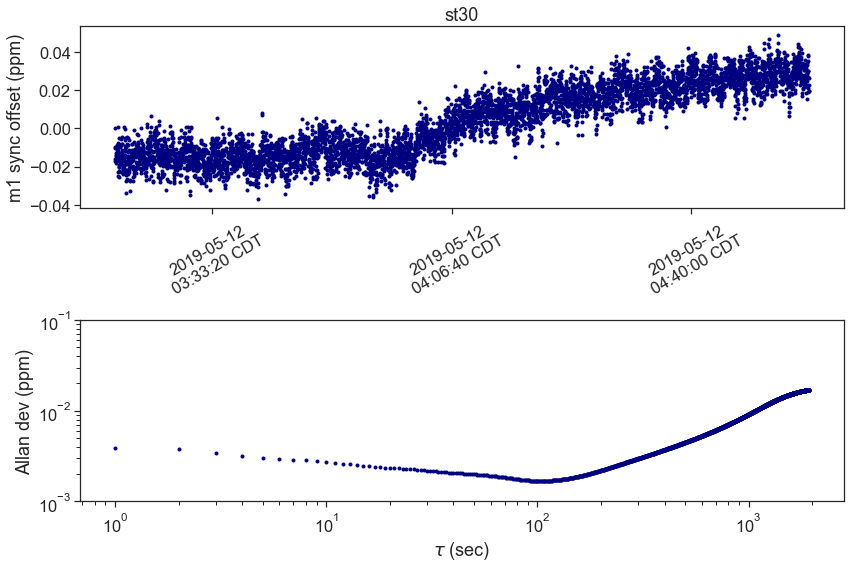

In [16]:
### define a fake trolley baseline with the first measurement
### this doesn't need to be accurate --- we just care about drift away
### compare to station 4, a "good" station near the trolley (but outside its footprint)

st = 'st30'

stms = [st+',m'+str(m+1) for m in range(6)]

tr_baseline = stationary_df[['tr,m'+str(m+1) for m in range(17)]].iloc[0].values
fp_baseline = stationary_df[stms].iloc[0].values

vtm_st4 = stationary_df[stms].copy()

# subtract fp baseline
for m in range(6):
    vtm_st4[st+',m'+str(m+1)] =  vtm_st4[st+',m'+str(m+1)] - fp_baseline[m]
    
# apply Jacobian (6 probe offset)
J = trfp.J_6_PROBE_OFFSET
stms = [st+',m'+str(m+1) for m in range(5)]
vtm_st4[stms] = vtm_st4[stms].dot(J)

# add tr baseline
for m in range(6):
    vtm_st4[st+',m'+str(m+1)] =  vtm_st4[st+',m'+str(m+1)] + tr_baseline[m]
    
# find sync offset as function of time
times =  vtm_st4.index.values
sync_offset = (stationary_df['tr,m1'].values - vtm_st4[st+',m1'].values)/61.79

fig, axs = plt.subplots(2,1)
plt.sca(axs[0])
plt.plot(times, sync_offset, '.', color='navy')
axs[0].set_ylabel('m1 sync offset (ppm)')
axs[0].set_title(st)
plt2.plt_unix_time_to_CST(axs[0])

# calculate Allan deviation of sync offsets
rate = 1.
taus_to_use = np.arange(0, 1000)
taus, adev, _, _ = allantools.mdev(sync_offset, data_type='freq', rate=rate, taus='all')

plt.sca(axs[1])
plt.loglog(taus, adev, '.', color='navy')
axs[1].set_ylim(0.001, 0.1)
axs[1].set_xlabel(r'$\tau$ (sec)')
axs[1].set_ylabel(r'Allan dev (ppm)')

fig.set_size_inches(12,8)
fig.tight_layout()

## Allan deviation of the trolley moments

In [26]:
5//3

1

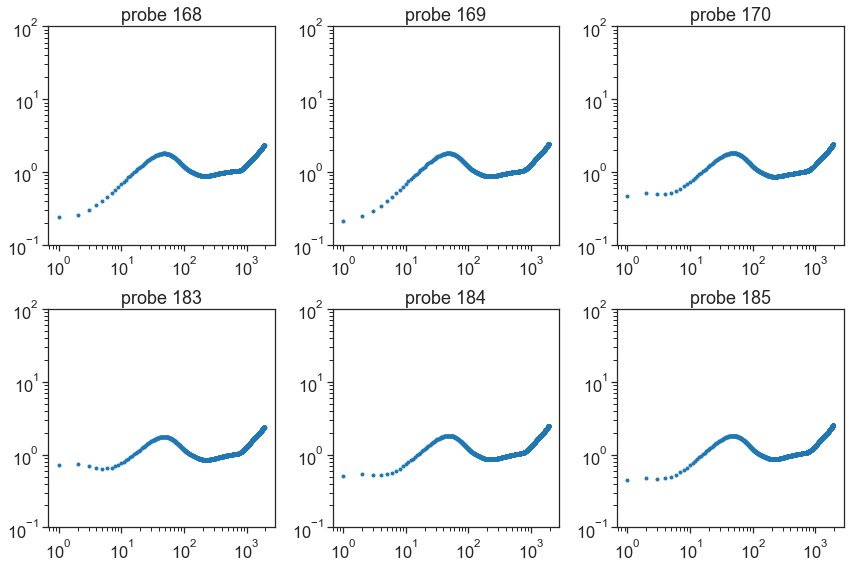

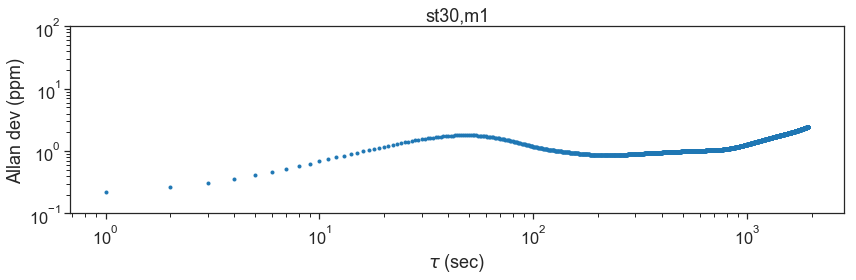

In [44]:
rate = 1.
st = 30
taus_to_use = np.arange(0, 5000)

fig, axs = plt.subplots(2,3)

probes = trfp.STATION_PROBE_ID[st]

for ii in range (6):
    plt.sca(axs[ii//3,ii%3])
#     trm = 'tr,m'+str(ms[ii-1,0])
    taus, adev, _, _ = allantools.mdev(runs[7309].interp_df['fp'+str(probes[ii])].values, data_type='freq', rate=rate, taus=taus_to_use)
    plt.loglog(taus, adev, '.')
    axs[ii//3, ii%3].set_title('probe '+str(probes[ii]))
    axs[ii//3, ii%3].set_ylim(0.1,100)
    

fig.set_size_inches(12,8)
fig.tight_layout()

fig2, ax2 = plt.subplots(1,1)
plt.sca(ax2)
taus, adev, _, _ = allantools.mdev(stationary_df['st'+str(st)+',m1'].values, data_type='freq', rate=rate, taus=taus_to_use)
plt.loglog(taus, adev, '.')
ax2.set_title('st'+str(st)+',m1')
ax2.set_ylim(0.1,100)

ax2.set_ylabel('Allan dev (ppm)')
ax2.set_xlabel(r'$\tau$ (sec)')

fig2.set_size_inches(12,4)
fig2.tight_layout()

In [ ]:
rate = 1.

taus_to_use = np.arange(0, 5000)

fig, axs = plt.subplots(5,2)

taus, adev, _, _ = allantools.mdev(stationary_df['tr,m1'].values, data_type='freq', rate=rate, taus=taus_to_use)

plt.sca(axs[0,0])
plt.loglog(taus, adev, '.')
axs[0,0].set_title('tr,m1')

ms = np.array([[2,3],[5,4],[6,7],[8,9]])

for ii in range (1,5):
    plt.sca(axs[ii,0])
    trm = 'tr,m'+str(ms[ii-1,0])
    taus, adev, _, _ = allantools.mdev(stationary_df[trm].values, data_type='freq', rate=rate, taus=taus_to_use)
    plt.loglog(taus, adev, '.')
    axs[ii,0].set_title(trm)
    plt.sca(axs[ii,1])
    trm = 'tr,m'+str(ms[ii-1,1])
    taus, adev, _, _ = allantools.mdev(stationary_df[trm].values, data_type='freq', rate=rate, taus=taus_to_use)
    plt.loglog(taus, adev, '.')
    axs[ii,1].set_title(trm)
    
axs[4,0].set_xlabel(r'$\tau$ (sec)')
axs[4,1].set_xlabel(r'$\tau$ (sec)')

fig.set_size_inches(12,16)
fig.tight_layout()

In [ ]:
def plt_unix_time_to_CST(ax):
    ax.locator_params(axis='x', nbins=4)
    xticks = ax.get_xticks()
    ax.set_xticklabels([pd.to_datetime(tm, unit='s').tz_localize('UTC').tz_convert('US/Central').strftime('%Y-%m-%d\n %H:%M:%S %Z')
                          for tm in xticks], rotation=30)


## Inflector region tracking
The following plots show both the trolley m1 (dipole) and the three "noisy" fixed probes stations (stations 1, 3, and 5) versus time. In both cases the mean over time has been subtracted to put them on the same baseline. Note that the trolley is closest to positioned under station 3.

In [ ]:
fig, axs = plt.subplots(3,1)
plt.sca(axs[1])
plt.plot(stationary_df.index.values, stationary_df['st3,m1']-np.mean(stationary_df['st3,m1']), '.', color='orange',
        label='st3, m1')
plt.plot(stationary_df.index.values, stationary_df['tr,m1']-np.mean(stationary_df['tr,m1']), '.', color='navy',
        label='tr, m1')

plt.sca(axs[0])
plt.plot(stationary_df.index.values, stationary_df['st1,m1']-np.mean(stationary_df['st1,m1']), '.', color='orange',
        label='st1, m1')
plt.plot(stationary_df.index.values, stationary_df['tr,m1']-np.mean(stationary_df['tr,m1']), '.', color='navy',
        label='tr, m1')

plt.sca(axs[2])
plt.plot(stationary_df.index.values, stationary_df['st5,m1']-np.mean(stationary_df['st5,m1']), '.', color='orange',
        label='st5, m1')
plt.plot(stationary_df.index.values, stationary_df['tr,m1']-np.mean(stationary_df['tr,m1']), '.', color='navy',
        label='tr, m1')

for ax in axs:
    plt_unix_time_to_CST(ax)
    ax.set_ylabel('Field - Mean Field (Hz)')
    ax.set_ylim((-110,110))
    ax.legend()

fig.set_size_inches(12,12)
fig.tight_layout()

In [ ]:
taus_to_use = np.arange(0, 5000)

taus, adev, _, _ = allantools.mdev(stationary_df['st1,m1'].values, data_type='freq', rate=rate, taus=taus_to_use)
fig, axs = plt.subplots(3,1)
plt.sca(axs[0])
plt.loglog(taus, adev, '.')
axs[0].set_title('st1,m1')

taus, adev, _, _ = allantools.mdev(stationary_df['st3,m1'].values, data_type='freq', rate=rate, taus=taus_to_use)
plt.sca(axs[1])
plt.loglog(taus, adev, '.')
axs[1].set_title('st3,m1')

taus, adev, _, _ = allantools.mdev(stationary_df['st5,m1'].values, data_type='freq', rate=rate, taus=taus_to_use)
plt.sca(axs[2])
plt.loglog(taus, adev, '.')
axs[2].set_title('st5,m1')

fig.set_size_inches(12,9)
fig.tight_layout()

The general trends seem to match. The following plots show the same data but averaged into bins of 25 seconds.

In [ ]:
print min(stationary_df.index.values)
print max(stationary_df.index.values)

In [ ]:
bins = np.arange(1557650000, 1557656000, 25)-12.5
bin_centers = np.arange(1557650000, 1557655975, 25)

stationary_time_bin_df = stationary_df.groupby(pd.cut(stationary_df.index,bins)).mean()
stationary_time_bin_df.index = bin_centers


In [ ]:
fig, axs = plt.subplots(3,1)
plt.sca(axs[1])
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['st3,m1']-np.mean(stationary_time_bin_df['st3,m1']), '.', color='orange',
         label='st3, m1')
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['tr,m1']-np.mean(stationary_time_bin_df['tr,m1']), '.', color='navy',
         label='tr, m1')

plt.sca(axs[0])
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['st1,m1']-np.mean(stationary_time_bin_df['st1,m1']), '.', color='orange',
         label='st1, m1')
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['tr,m1']-np.mean(stationary_time_bin_df['tr,m1']), '.', color='navy',
         label='tr, m1')

plt.sca(axs[2])
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['st5,m1']-np.mean(stationary_time_bin_df['st5,m1']), '.', color='orange',
         label='st5, m1')
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['tr,m1']-np.mean(stationary_time_bin_df['tr,m1']), '.', color='navy',
         label='tr, m1')

for ax in axs:
    plt_unix_time_to_CST(ax)
    ax.set_ylabel('Field - Mean Field (Hz)')
    ax.set_ylim((-30,30))
    ax.legend()

fig.set_size_inches(12,12)
fig.tight_layout()


There is good agreement of long-term drift and structure, especially in station 3. The other two stations track better with longer averaging times as they are intrinsically noisier.

## Long averaging for tracking

The following plots show the inflector station m1 tracking for an averaging window of 250 seconds instead of 25.

In [ ]:
bins = np.arange(1557650000, 1557656000, 250)-125
bin_centers = np.arange(1557650000, 1557655750, 250)

stationary_time_bin_df = stationary_df.groupby(pd.cut(stationary_df.index,bins)).mean()
stationary_time_bin_df.index = bin_centers

fig, axs = plt.subplots(3,1)
plt.sca(axs[1])
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['st3,m1']-np.mean(stationary_time_bin_df['st3,m1']), '.', color='orange',
         label='st3, m1')
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['tr,m1']-np.mean(stationary_time_bin_df['tr,m1']), '.', color='navy',
         label='tr, m1')

plt.sca(axs[0])
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['st1,m1']-np.mean(stationary_time_bin_df['st1,m1']), '.', color='orange',
         label='st1, m1')
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['tr,m1']-np.mean(stationary_time_bin_df['tr,m1']), '.', color='navy',
         label='tr, m1')

plt.sca(axs[2])
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['st5,m1']-np.mean(stationary_time_bin_df['st5,m1']), '.', color='orange',
         label='st5, m1')
plt.plot(stationary_time_bin_df.index.values,
         stationary_time_bin_df['tr,m1']-np.mean(stationary_time_bin_df['tr,m1']), '.', color='navy',
         label='tr, m1')

for ax in axs:
    plt_unix_time_to_CST(ax)
    ax.set_ylabel('Field - Mean Field (Hz)')
    ax.set_ylim((-10,10))
    ax.legend()

fig.set_size_inches(12,12)
fig.tight_layout()



In [ ]:
# Apply Jacobian

print "\n\nApplying Jacobian."
vtr_df = stationary_time_bin_df.copy()

for st in np.arange(72):
    num_probes = len(trfp.STATION_PROBE_ID[st])
    if num_probes == 4:
        num_moments = 4
        if st == 41:
            J = trfp.J_4_PROBE_ST41
        elif st == 37 | st == 39:
            J = trfp.J_4_PROBE_ST37_ST39
        else:
            J = trfp.J_4_PROBE
    else:
        num_moments = 5
        if st < 7:
            J = trfp.J_6_PROBE_OFFSET.copy()
        else:
            J = trfp.J_6_PROBE
#         J[0,4] = 0
    # run over each vtr moment:
    for m in np.arange(num_moments):
        vtr_stm = 'st'+str(st)+',m'+str(m+1)
        fp_stm = ['st'+str(st)+',m'+str(fp_m+1) for fp_m in np.arange(num_moments)]
        vtr_df[vtr_stm] = stationary_df[fp_stm].dot(J[m])
        

In [ ]:
J = trfp.J_6_PROBE_OFFSET.copy()

print np.round(J,2)

In [ ]:
fig, axs = plt.subplots(3,2)
plt.sca(axs[1,0])
plt.plot(vtr_df.index.values,
         vtr_df['st3,m1']-np.mean(vtr_df['st3,m1']), '.', color='orange',
         label='st3, m1')
plt.plot(vtr_df.index.values,
         vtr_df['tr,m1']-np.mean(vtr_df['tr,m1']), '.', color='navy',
         label='tr, m1')

plt.sca(axs[0,0])
plt.plot(vtr_df.index.values,
         vtr_df['st1,m1']-np.mean(vtr_df['st1,m1']), '.', color='orange',
         label='st1, m1')
plt.plot(vtr_df.index.values,
         vtr_df['tr,m1']-np.mean(vtr_df['tr,m1']), '.', color='navy',
         label='tr, m1')

plt.sca(axs[2,0])
plt.plot(vtr_df.index.values,
         vtr_df['st5,m1']-np.mean(vtr_df['st5,m1']), '.', color='orange',
         label='st5, m1')
plt.plot(vtr_df.index.values,
         vtr_df['tr,m1']-np.mean(vtr_df['tr,m1']), '.', color='navy',
         label='tr, m1')

plt.sca(axs[1,1])
plt.plot(vtr_df.index.values,
         (vtr_df['tr,m1']-np.mean(vtr_df['tr,m1'])) - 
         (vtr_df['st3,m1']-np.mean(vtr_df['st3,m1'])), '.', color='navy')

plt.sca(axs[0,1])
plt.plot(vtr_df.index.values,
         (vtr_df['tr,m1']-np.mean(vtr_df['tr,m1'])) - 
         (vtr_df['st1,m1']-np.mean(vtr_df['st1,m1'])), '.', color='navy')

plt.sca(axs[2,1])
plt.plot(vtr_df.index.values,
         (vtr_df['tr,m1']-np.mean(vtr_df['tr,m1'])) - 
         (vtr_df['st5,m1']-np.mean(vtr_df['st5,m1'])), '.', color='navy')

for ax in axs[:,0]:
    plt_unix_time_to_CST(ax)
    ax.set_ylabel('Field - Mean Field (Hz)')
    ax.set_ylim((-500,500))
    ax.legend()
    
for ax in axs[:,1]:
    plt_unix_time_to_CST(ax)
    ax.set_ylabel('Tr - FP Residuals')
    ax.set_ylim((-600,600))

fig.set_size_inches(12,12)
fig.tight_layout()

